# Project: Olufemi's Investigation of a Dataset - [noshowappointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This Dataset is a table showing the appointment records of patients (identified by Patient Id) along with other details including appointment id, date and time, age of patients, hospital location and brief medical history (if the patient is registered for scholarship program, hypertensive, diabetic, alcoholic, etc.). The columns in this dataset are: PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, and No-show.

### Question(s) for Analysis

Some questions that this analysis would hope to answer are; 
1. What might be the reason a patient doesn't show up for their appointment? Hospital location? Age? How far apart the the appointment date is from the date they scheduled.


In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#loading dataset and previewing
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Neighbourhood column is location of the hospital
Scholarship column identifies whether the patient is registered to the scholarship program
No-show column: yes for No-show, no for when the patient shows up for the appointment.

In [3]:
#getting information on the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


checking for wrong data type

In [4]:
type(df['ScheduledDay'][0])

str

converting datatype to useable form

In [5]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

checking for wrong data type

In [6]:
type(df['AppointmentDay'][0])

str

converting datatype to useable form

In [7]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [8]:
#confirming change in data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


checking for duplicated data

In [9]:
sum(df.duplicated())

0

In [10]:
#extracting statistical data on the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It is observed that a (or some) patient(s) has wrong age: -1 since min age is -1

Row(s) where we have these 'patients' with wrong age (-1) is located and removed. 
Locating the row index of patient with wrong age

In [11]:
for r in range(len(df)):
    if df.iloc[r,5] < 0:
        print (r)

99832


In [12]:
#Confirming the row index of patient with wrong age
print(df.iloc[99832,])

PatientId                 4.65943e+14
AppointmentID                 5775010
Gender                              F
ScheduledDay      2016-06-06 08:58:13
AppointmentDay    2016-06-06 00:00:00
Age                                -1
Neighbourhood                   ROMÃO
Scholarship                         0
Hipertension                        0
Diabetes                            0
Alcoholism                          0
Handcap                             0
SMS_received                        0
No-show                            No
Name: 99832, dtype: object



### Data Cleaning

In [13]:
#Duplicating our dataset so as to keep the original file
df_clean = df.copy()

corrrecting wrong data type in duplicate dataset

In [14]:
df_clean['AppointmentDay'] = pd.to_datetime(df_clean['AppointmentDay'])
df_clean['ScheduledDay'] = pd.to_datetime(df_clean['ScheduledDay'])

checking for row of patient with data anomally

In [15]:
print(df_clean.iloc[99832,])

PatientId                 4.65943e+14
AppointmentID                 5775010
Gender                              F
ScheduledDay      2016-06-06 08:58:13
AppointmentDay    2016-06-06 00:00:00
Age                                -1
Neighbourhood                   ROMÃO
Scholarship                         0
Hipertension                        0
Diabetes                            0
Alcoholism                          0
Handcap                             0
SMS_received                        0
No-show                            No
Name: 99832, dtype: object


Row where we have these 'patients' with wrong age (-1) is removed 

In [16]:
df_clean.drop(df_clean.index[99832], inplace = True)

In [17]:
#checking if row of patient with wrong age dropped successfully
for r in range(len(df_clean)):
    if df_clean.iloc[r,5] < 0:
        print (r)
        

Create new column 'KeptAppointment' to remove the confusing logic of the 'No-show' column

In [18]:
df_clean['KeptAppointment'] = ""
#previewing dataset
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,KeptAppointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,


'Yes' from the original 'No-show' column will be changed to 'No' for new column 'KeptAppointment'. Also, each row value can be changed to numbers 1 and 0 for Yes and No

In [19]:
df_clean['No-show'].apply(lambda x: 0 if x == 'Yes' else 1)
df_clean['KeptAppointment'] = df_clean['No-show'].apply(lambda x: 0 if x == 'Yes' else 1)
#preview dataset to confirm changes
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,KeptAppointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


In [20]:
#extracting statistical data for more evaluation
df_clean.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,KeptAppointment
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


Most patients did not keep their appointments. Also, most patients do not belong to the scholarship program.

<a id='eda'></a>
## Exploratory Data Analysis

### What might be the reason a patient doesn't show up for their appointment?

We will view the 'Kept Appointment?' column alongside other columns to examine relationships.

In [21]:
#creating subsets of the dataset to analyse separately
kept_appointment = df_clean.KeptAppointment == 1
failed_appointment = df_clean.KeptAppointment == 0

In [22]:
#examining the data of those who kept appointments
df_clean[kept_appointment].describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,KeptAppointment
count,8.820700e+04,8.820700e+04,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.0
mean,1.476809e+14,5.681135e+06,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,1.0
std,2.563739e+14,6.931193e+04,23.338645,0.291697,0.403261,0.261508,0.171733,0.162751,0.454381,0.0
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.168386e+12,5.646218e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,3.176138e+13,5.685683e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,9.433684e+13,5.731078e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0


In [23]:
#examining the data of those who didn't keep appointments
df_clean[failed_appointment].describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,KeptAppointment
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.0
mean,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,0.0
std,2.549905e+14,7.429686e+04,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,0.0
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.176779e+12,5.614192e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.156794e+13,5.657916e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9.454270e+13,5.703175e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,9.996585e+14,5.789986e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.0


People who kept their appointments had their appointment 8 days(mean) after schedule while those who didn't keep to their appointments had their appointment 15 days(mean) after.

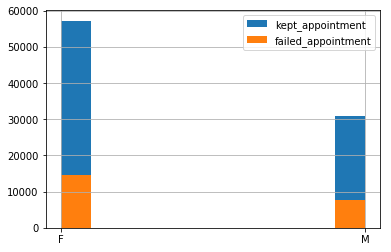

In [24]:
#examining the gender of those who kept appointments vs those who didn't
df_clean.Gender[kept_appointment].hist(label = 'kept_appointment')
df_clean.Gender[failed_appointment].hist(label = 'failed_appointment')
plt.legend();

It could be seen that for each gender, the ratio of those who kept to their appointments over those who didn't appear similar.

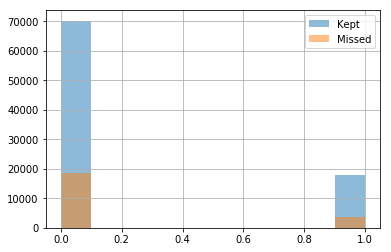

In [25]:
#examining the hypertension history of those who kept appointments vs those who didn't
df_clean.Hipertension[kept_appointment].hist(alpha = 0.5, label = 'Kept')
df_clean.Hipertension[failed_appointment].hist(alpha = 0.5, label = 'Missed')
plt.legend();


It is observed that a good number of people without hypertension kept to their appointment compared to those with hypertension

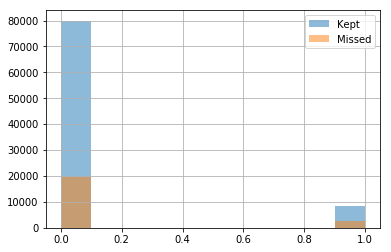

In [26]:
#examining the scholarship status of those who kept appointments vs those who didn't
df_clean.Scholarship[kept_appointment].hist(alpha = 0.5, label = 'Kept')
df_clean.Scholarship[failed_appointment].hist(alpha = 0.5, label = 'Missed')
plt.legend();


It is observed that high number of people are without the scholarship and a good number of them kept to their appointment. The scholarship might not have influence over whether they keep to appointment or not.

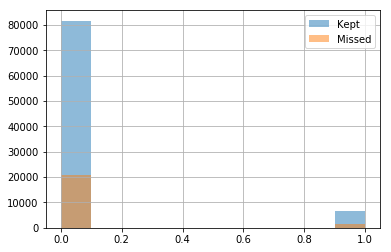

In [27]:
#examining the diabetes history of those who kept appointments vs those who didn't
df_clean.Diabetes[kept_appointment].hist(alpha = 0.5, label = 'Kept')
df_clean.Diabetes[failed_appointment].hist(alpha = 0.5, label = 'Missed')
plt.legend();


It is observed that a good number of people without diabetes kept to their appointment compared to those with diabetes

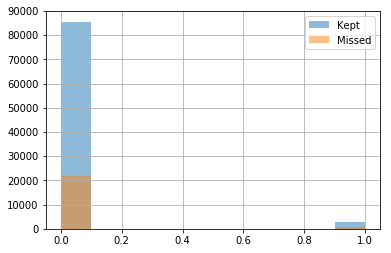

In [28]:
#examining the alcohol history of those who kept appointments vs those who didn't
df_clean.Alcoholism[kept_appointment].hist(alpha = 0.5, label = 'Kept')
df_clean.Alcoholism[failed_appointment].hist(alpha = 0.5, label = 'Missed')
plt.legend();


It is observed that a good number of people without alcohol history kept to their appointment compared to those with 

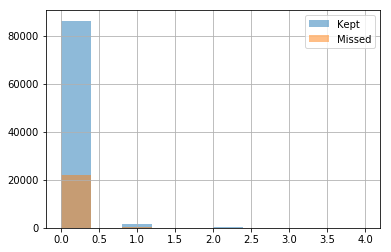

In [29]:
#examining the gender of those who kept appointments vs those who didn't
df_clean.Handcap[kept_appointment].hist(alpha = 0.5, label = 'Kept')
df_clean.Handcap[failed_appointment].hist(alpha = 0.5, label = 'Missed')
plt.legend();


It is observed that a good number of people without disability kept to their appointment compared to those with. There's hardly any data for those with high number of disability

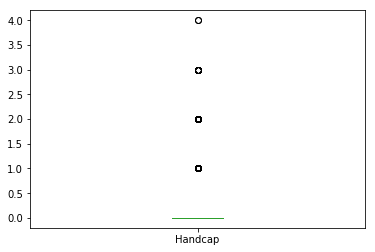

In [30]:
#further examining the data of those who were handicapped
df_clean.Handcap[kept_appointment].plot(kind='box');

It can be said that people with 4 handicapped parts were well represented in the data

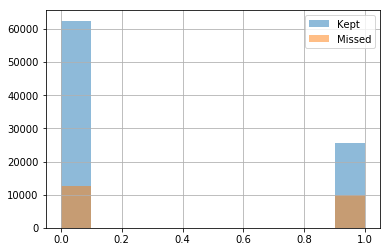

In [31]:
#examining the reminder sms records of those who kept appointments vs those who didn't
df_clean.SMS_received[kept_appointment].hist(alpha = 0.5, label = 'Kept')
df_clean.SMS_received[failed_appointment].hist(alpha = 0.5, label = 'Missed')
plt.legend();

It is seen that the ratio of those that kept their appontments to those that didnt for people who received sms reminder or not are similar hence, SMS reminder had no influence over patients keeping to appointmen

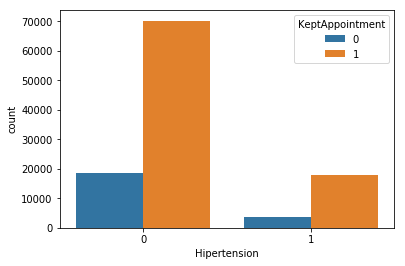

In [32]:
#examining the hipertension history against those who kept appointments 
sns.countplot(data=df_clean, x='Hipertension', hue = 'KeptAppointment');

It is confirmed that a good number of people without hypertension history kept to their appointment compared to those with

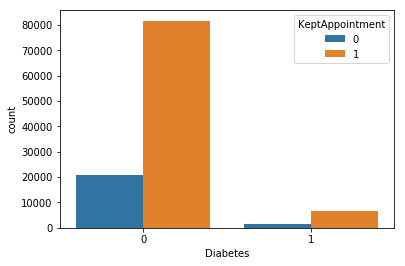

In [33]:
#examining the diabetes history against those who kept appointments 
sns.countplot(data=df_clean, x='Diabetes', hue = 'KeptAppointment');

It is confirmed that a good number of people without diabetes history kept to their appointment compared to those with

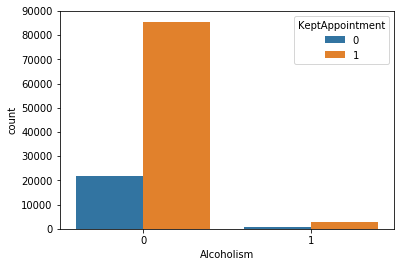

In [34]:
#examining the alcohol history against those who kept appointments 
sns.countplot(data=df_clean, x='Alcoholism', hue = 'KeptAppointment');

It is confirmed that a good number of people without alcohol history kept to their appointment compared to those with

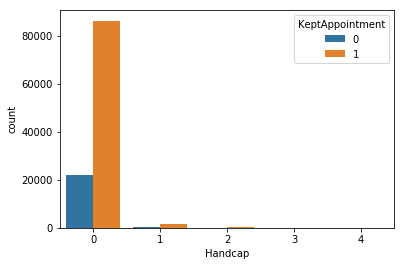

In [35]:
#examining the disability history against those who kept appointments 
sns.countplot(data=df_clean, x='Handcap', hue = 'KeptAppointment');

It is confirmed that a good number of people without disability kept to their appointment compared to those with

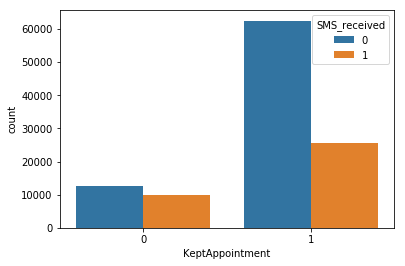

In [36]:
#examining the sms data against those who kept appointments 
sns.countplot(data=df_clean, x='KeptAppointment',  hue = 'SMS_received');

Ratio similar for sms received and sms not received

In [37]:
#examining the mean history age of those who kept appointments 
df_clean.Age[kept_appointment].mean()

37.790504154999034

In [38]:
#examining the mean age of those who didn't keep appointments 
df_clean.Age[failed_appointment].mean()

34.317666562121957

<a id='conclusions'></a>
## Conclusions
It is seen in the exploratory analysis that:
1. People with one ailment or the other did not keep to their appointments
2. People that were in the scholarship program were less in number compared to those that weren't in the scholarship
3. SMS reminder had no influence over patients keeping to appointment
4. People who kept their appointments had their appointment 8 days(mean) after schedule while those who didn't keep to their appointments had their appointment 15 days(mean) after.

## Limitations

The different hospital locations were too many to be able to draw a reasonable conclusion/pattern from.


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

I researched pandas methods from pandas documentation on google and worked through my errors from StackOverflow